#### Data Analyst: Reuben Yohanna Vandi
# Tukshopp Online Delivery Service, Survey Data Analysis
### Problem Statement
The online delivery service market in Jos, Plateau State, faces challenges in meeting customer expectations, with issues ranging from delivery time and payment methods to product offerings and customer satisfaction. To improve the overall delivery experience, it is essential to understand the preferences, behaviors, and pain points of consumers in Jos.

### Objectives
1. To identify the demographics and characteristics of online delivery service users in Jos.
2. To determine the frequency and patterns of online ordering behavior among consumers in Jos.
3. To understand the preferred payment methods, product categories, and delivery times of online delivery service users in Jos.
4. To assess the level of satisfaction with current online delivery services and identify areas for improvement.
5. To gather insights on the willingness to use a comprehensive delivery service like TukShopp and the preferred features and services.
6. To inform the development of strategies to enhance the online delivery experience in Jos, addressing the needs and expectations of consumers.

#### Loading Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from dateutil import parser
from collections import Counter
from matplotlib import pyplot as plt

#### Loading Survey Data

In [2]:
df= pd.read_excel(r"C:\Users\Reuben Yohanna Vandi\Documents\PORTFOLIO\TukShopp Market Research by Reuben Yohanna Vandi & John Eze\TukShopp Delivery App Survey.xlsx")
pd.set_option('display.max_columns', 30) 
#pd.set_option('display.max_rows', 174)
df

,Timestamp,Age:,Gender:,Occupation:,Household Size:,Monthly Household Income:,How often do you use online delivery services?,Which type of products do you most frequently order online?,Preferred Payment Method for Online Orders:,How much do you typically spend on online orders per month?,How do you usually place your orders?,What time of day do you usually place online orders?,What would be your primary reason for using a food and grocery delivery service? (Select all that apply)\n,How important is the delivery time to you?,What are your top priorities when choosing a delivery service? (Select up to 3),Which feature is most important to you in a food delivery app?,How satisfied are you with the current online delivery services available in Jos?\n,What are the biggest challenges you've faced with online delivery services in Jos? (Select all that apply)\n,"How likely are you to use a comprehensive delivery service (like TukShopp) that offers food, groceries, beverages and pharmaceuticals?",How much would you be willing to pay for delivery services?\n,"Would you prefer to have the option for subscription-based delivery services (e.g., monthly fee for unlimited deliveries)?",How do you usually decide which delivery service to use?\n,Do you prefer ordering from well-known restaurant chains or local eateries?\n,What improvements would you like to see in online delivery services in Jos?,Are there any additional features or services you would like TukShopp to offer?,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,2024/06/13 3:51:21 PM GMT+1,25-34,Male,Employed,1 (Living Alone),"Less than â‚¦50,000",Daily,Meals from Restaurants;Groceries,Cash on Delivery;Bank Transfer,"â‚¦10,000 - â‚¦50,000",Mobile App;WhatsApp/Instagram,Morning;Afternoon,Convenience;Time-saving,Very Important,Cost of Delivery,Real-time Order Tracking;Multiple Payment Opti...,Dissatisfied,Delayed Deliveries;Poor Product Quality,Very Likely,â‚¦1000 - â‚¦5000,Yes,Recommendations from Friends/Family;Online Rev...,Local Eateries,Quick and efficient delivery,Nil,"Real time tracking,different payment options",Looking forward to using the app,Very Important,Very Likely
1,2024/06/13 4:22:24 PM GMT+1,18-24,Male,Freelancer,1 (Living Alone),"â‚¦100,000 - â‚¦200,000",Rarely,Meals from Restaurants;Clothings,Debit/Credit Card;Bank Transfer,"â‚¦10,000 - â‚¦50,000",Mobile App;Website;WhatsApp/Instagram,Afternoon;Evening,Convenience;Time-saving;Avoiding crowded places,Important,Quality of Products;Cost of Delivery,User-friendly Interface;Discounts and Promotio...,Neutral,High Delivery Costs,Likely,â‚¦500 - â‚¦1000,Yes,Previous Experience,No Preference,More delivery services should be encouraged,Nil,Fast,Nil,NaN,NaN
2,2024/06/13 5:25:10 PM GMT+1,25-34,Female,Employed,6,"Less than â‚¦50,000",Rarely,Electronics/Gadgets,Cash on Delivery,"Less than â‚¦5,000",Mobile App,Morning,Limited mobility/transportation,Very Important,Quality of Products,Discounts and Promotions,Satisfied,Delayed Deliveries,Unlikely,â‚¦500 - â‚¦1000,Yes,Recommendations from Friends/Family,Well-known Restaurants,Effective and efficient delivery,Different options to select from,NaN,NaN,NaN,NaN
3,2024/06/13 5:33:22 PM GMT+1,25-34,Male,Employed,1 (Living Alone),"â‚¦100,000 - â‚¦200,000",Monthly,Electronics/Gadgets,Bank Transfer,"â‚¦10,000 - â‚¦50,000",Mobile App,Late Night,Time-saving,Very Important,Speed of Delivery;Quality of Products;Ease of ...,Multiple Payment Options;Discounts and Promotions,Neutral,Delayed Deliveries;Poor Product Quality,Very Likely,â‚¦500 - â‚¦1000,Maybe,Recommendations from Friends/Family,Well-known Restaurants,Cost effective and time,Electronics,NaN,NaN,NaN,NaN
4,2024/06/13 5:47:57 PM GMT+1,18-24,Female,Freelancer,6,"â‚¦300,000+",Weekly,Meals from Restaurants,Bank Transfer,"â‚¦10,000 - â‚¦50,000",WhatsApp/Instagram,Afternoon,Limited mobility/transportation,Very Important,Customer Service,Multiple Payment Options,Neutral,Inconsistent Service,Very Likely,â‚¦1000 - â‚¦5000,Maybe,Previous Experienc

To ensure accurate results from the conducted survey, the data must be cleaned and formatted properly by the data analyst/statistician

* Removing irrelevant columns: Eliminate unnecessary data to focus on relevant information
* Removal of duplicated data: Eliminate duplicate responses and ensure all necessary information is complete
* Data Transformation/Standardizing data formats: Ensure consistency in data formatting, such as date or numerical formats
* Handling errors and inconsistencies in the data: Removing special characters, punctuation, or whitespace from text data
* Handling blank or missing values: Decide on a strategy for dealing with missing data, such as imputation or deletion

In [3]:
#Removing irrelevant columns
df = df.drop(columns=['Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'])

In [4]:
#Cofirmation before the Removal of Duplicated Data
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
168    False
169    False
170    False
171    False
172    False
Length: 173, dtype: bool

In [5]:
#Data Transformation by standardizing data format
df['Timestamp'] = df['Timestamp'].apply(parser.parse)
df['Timestamp']

0     2024-06-13 15:51:21-01:00
1     2024-06-13 16:22:24-01:00
2     2024-06-13 17:25:10-01:00
3     2024-06-13 17:33:22-01:00
4     2024-06-13 17:47:57-01:00
                 ...           
168   2024-06-16 09:59:11-01:00
169   2024-06-16 11:38:30-01:00
170   2024-06-16 20:20:31-01:00
171   2024-06-17 08:39:42-01:00
172   2024-06-17 17:33:03-01:00
Name: Timestamp, Length: 173, dtype: datetime64[ns, tzoffset(None, -3600)]

In [6]:
#Handling errors and inconsistencies in the data
df = df.applymap(lambda x: x.strip('.;,/-_') if type(x) == str else x)

In [7]:
df.columns

Index(['Timestamp', 'Age:', 'Gender:', 'Occupation:', 'Household Size:',
       'Monthly Household Income:',
       'How often do you use online delivery services?',
       'Which type of products do you most frequently order online?  ',
       'Preferred Payment Method for Online Orders:  ',
       'How much do you typically spend on online orders per month?',
       'How do you usually place your orders?',
       'What time of day do you usually place online orders? ',
       'What would be your primary reason for using a food and grocery delivery service? (Select all that apply)\n',
       'How important is the delivery time to you?',
       'What are your top priorities when choosing a delivery service? (Select up to 3)  ',
       'Which feature is most important to you in a food delivery app?  ',
       'How satisfied are you with the current online delivery services available in Jos?\n',
       'What are the biggest challenges you've faced with online delivery services in Jos? (S

In [8]:
df.rename(columns={'Age:':'Age', 'Gender:':'Gender', 'Occupation:':'Occupation', 'Household Size:':'Household Size','Monthly Household Income:':'Monthly Household Income',
'How often do you use online delivery services?':'Usage frequency of online delivery service','Which type of products do you most frequently order online?  ':'Products frequently ordered online',
'Preferred Payment Method for Online Orders:  ':'Payment method','How much do you typically spend on online orders per month?':'Amount spent online',
'How do you usually place your orders?':'Method of placing order','What time of day do you usually place online orders? ':'Time of placing order',
'What would be your primary reason for using a food and grocery delivery service? (Select all that apply)\n':'Reason for using online delivery service',
'How important is the delivery time to you?':'Importance of delivery time','What are your top priorities when choosing a delivery service? (Select up to 3)  ':'Priority in choosing delivery service',
'Which feature is most important to you in a food delivery app?  ':'Most important feature on delivery app',
'How satisfied are you with the current online delivery services available in Jos?\n':'Satisfaction on Jos delivery services',
"What are the biggest challenges you've faced with online delivery services in Jos? (Select all that apply)\n":'Challenges using online delivery service',
'How likely are you to use a comprehensive delivery service (like TukShopp) that offers food, groceries, beverages and pharmaceuticals?  ':'How certain will you use comprehensive delivery service',
'How much would you be willing to pay for delivery services?\n':'Budget for delivery service',
'Would you prefer to have the option for subscription-based delivery services (e.g., monthly fee for unlimited deliveries)?':'Prefer subscrption based delivery service?',
'How do you usually decide which delivery service to use?\n':'How to make Choice on delivery service to use',
'Do you prefer ordering from well-known restaurant chains or local eateries?\n':'Prefer ordering from popular eateries?',
'What improvements would you like to see in online delivery services in Jos?':'Suggest Improvement',
'Are there any additional features or services you would like TukShopp to offer?':'Suggest features/services for Tukshopp'}, inplace=True)

In [9]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Occupation', 'Household Size',
       'Monthly Household Income',
       'Usage frequency of online delivery service',
       'Products frequently ordered online', 'Payment method',
       'Amount spent online', 'Method of placing order',
       'Time of placing order', 'Reason for using online delivery service',
       'Importance of delivery time', 'Priority in choosing delivery service',
       'Most important feature on delivery app',
       'Satisfaction on Jos delivery services',
       'Challenges using online delivery service',
       'How certain will you use comprehensive delivery service',
       'Budget for delivery service',
       'Prefer subscrption based delivery service?',
       'How to make Choice on delivery service to use',
       'Prefer ordering from popular eateries?', 'Suggest Improvement',
       'Suggest features/services for Tukshopp'],
      dtype='object')

In [10]:
df['Household Size'].unique()

array(['1 (Living Alone)', 6, datetime.datetime(2024, 2, 3, 0, 0),
       datetime.datetime(2024, 4, 5, 0, 0)], dtype=object)

In [11]:
#transforming inappropriate datetime data into the supposed data in Household Size column
def replace_datetime(x):
    if x == datetime(2024, 2, 3, 0, 0):
        return '3 - 4'
    elif x == datetime(2024, 4, 5, 0, 0):
        return '4 - 5'
    else:
        return x

df['Household Size'] = df['Household Size'].apply(replace_datetime)

df['Household Size'] = df['Household Size'].replace(6, '6+')
df['Household Size'].unique()

array(['1 (Living Alone)', '6+', '3 - 4', '4 - 5'], dtype=object)

In [12]:
df['Monthly Household Income'].unique()

array(['Less than â‚¦50,000', 'â‚¦100,000 - â‚¦200,000', 'â‚¦300,000+',
       'â‚¦50,000 - â‚¦100,000', 'â‚¦200,000 - â‚¦300,000', nan],
      dtype=object)

In [13]:
df['Monthly Household Income'] = df['Monthly Household Income'].replace({'Less than â‚¦50,000':'Less than N50,000','â‚¦100,000 - â‚¦200,000':'N100,000 - N200,000',
                                       'â‚¦300,000+':'N300,000+','â‚¦50,000 - â‚¦100,000':'N50,000 - N100,000',
                                        'â‚¦200,000 - â‚¦300,000':'N200,000 - N300,000',})
df['Monthly Household Income'].unique()

array(['Less than N50,000', 'N100,000 - N200,000', 'N300,000+',
       'N50,000 - N100,000', 'N200,000 - N300,000', nan], dtype=object)

In [14]:
df['Usage frequency of online delivery service'].unique()

array(['Daily', 'Rarely', 'Monthly', 'Weekly', 'Yearly ', 'Never',
       'Sometimes', "As they're available", 'Sometimes '], dtype=object)

In [15]:
df['Usage frequency of online delivery service'] = df['Usage frequency of online delivery service'].replace('Sometimes ','Sometimes')
df['Usage frequency of online delivery service'].unique()

array(['Daily', 'Rarely', 'Monthly', 'Weekly', 'Yearly ', 'Never',
       'Sometimes', "As they're available"], dtype=object)

In [16]:
df['Products frequently ordered online'].unique()

array(['Meals from Restaurants;Groceries',
       'Meals from Restaurants;Clothings', 'Electronics/Gadgets',
       'Meals from Restaurants',
       'Meals from Restaurants;Groceries;Electronics/Gadgets',
       'Meals from Restaurants;Beverages;Electronics/Gadgets',
       'Skincare products ', 'Underwear ', 'Beverages',
       'Clothes and other assesories ',
       'Meals from Restaurants;Electronics/Gadgets', 'Textiles, jewelry ',
       'Pharmacetical Products;Clothes',
       'Groceries;Pharmacetical Products;Electronics/Gadgets;Cloths and shoes',
       'I', 'Groceries',
       'Meals from Restaurants;Groceries;Pharmacetical Products;Beverages;Electronics/Gadgets',
       'Question 1 answers this',
       'Meals from Restaurants;Groceries;Beverages',
       'Pharmacetical Products', 'Clothes ',
       "It's Groceries I've been looking for o. I thought GoLemon would be here, but they're only in Lagos",
       'Meals from Restaurants;Clothes, shoes and accessories', 'Clothes',
   

In [17]:
df['Products frequently ordered online'] = df['Products frequently ordered online'].replace('I', np.nan)
df['Products frequently ordered online'] = df['Products frequently ordered online'].replace('Clothes ', 'Clothes')
df['Products frequently ordered online'] = df['Products frequently ordered online'].replace('Question 1 answers this', 'I do not really order anything online')
df['Products frequently ordered online'].unique()

array(['Meals from Restaurants;Groceries',
       'Meals from Restaurants;Clothings', 'Electronics/Gadgets',
       'Meals from Restaurants',
       'Meals from Restaurants;Groceries;Electronics/Gadgets',
       'Meals from Restaurants;Beverages;Electronics/Gadgets',
       'Skincare products ', 'Underwear ', 'Beverages',
       'Clothes and other assesories ',
       'Meals from Restaurants;Electronics/Gadgets', 'Textiles, jewelry ',
       'Pharmacetical Products;Clothes',
       'Groceries;Pharmacetical Products;Electronics/Gadgets;Cloths and shoes',
       nan, 'Groceries',
       'Meals from Restaurants;Groceries;Pharmacetical Products;Beverages;Electronics/Gadgets',
       'I do not really order anything online',
       'Meals from Restaurants;Groceries;Beverages',
       'Pharmacetical Products', 'Clothes',
       "It's Groceries I've been looking for o. I thought GoLemon would be here, but they're only in Lagos",
       'Meals from Restaurants;Clothes, shoes and accessories',
 

In [18]:
df['Amount spent online'].unique()

array(['â‚¦10,000 - â‚¦50,000', 'Less than â‚¦5,000',
       'â‚¦5,000 - â‚¦10,000', 'â‚¦50,000+', nan], dtype=object)

In [19]:
df['Amount spent online'] = df['Amount spent online'].replace({'â‚¦10,000 - â‚¦50,000':'N10,000 - N50,000','Less than â‚¦5,000':'Less than N5,000',
                                  'â‚¦5,000 - â‚¦10,000':'N5,000 - N10,000','â‚¦50,000+':'N50,000+'})
df['Amount spent online'].unique()

array(['N10,000 - N50,000', 'Less than N5,000', 'N5,000 - N10,000',
       'N50,000+', nan], dtype=object)

In [20]:
df['Method of placing order'].unique()

array(['Mobile App;WhatsApp/Instagram',
       'Mobile App;Website;WhatsApp/Instagram', 'Mobile App',
       'WhatsApp/Instagram', 'Website',
       'Website;Phone Call;WhatsApp/Instagram', 'Phone Call',
       'Mobile App;Website',
       'Mobile App;Website;Phone Call;WhatsApp/Instagram',
       'Mobile App;Phone Call;WhatsApp/Instagram', 'Website;Phone Call',
       'Phone Call;WhatsApp/Instagram', 'Website;WhatsApp/Instagram',
       'Mobile App;Mobile App or WhatsApp or Phone Call works fine for me',
       'Mobile App;Phone Call', 'Store', 'Mobile App;Website;Phone Call',
       nan, 'none', 'Nop'], dtype=object)

In [21]:
df['Method of placing order'] = df['Method of placing order'].replace(['none', 'Nop'], 'None')
df['Method of placing order'].unique()

array(['Mobile App;WhatsApp/Instagram',
       'Mobile App;Website;WhatsApp/Instagram', 'Mobile App',
       'WhatsApp/Instagram', 'Website',
       'Website;Phone Call;WhatsApp/Instagram', 'Phone Call',
       'Mobile App;Website',
       'Mobile App;Website;Phone Call;WhatsApp/Instagram',
       'Mobile App;Phone Call;WhatsApp/Instagram', 'Website;Phone Call',
       'Phone Call;WhatsApp/Instagram', 'Website;WhatsApp/Instagram',
       'Mobile App;Mobile App or WhatsApp or Phone Call works fine for me',
       'Mobile App;Phone Call', 'Store', 'Mobile App;Website;Phone Call',
       nan, 'None'], dtype=object)

In [22]:
df['Budget for delivery service'].unique()

array(['â‚¦1000 - â‚¦5000', 'â‚¦500 - â‚¦1000', 'Less than â‚¦500',
       'More than â‚¦5000', 'Option 5', nan], dtype=object)

In [23]:
df['Budget for delivery service'] = df['Budget for delivery service'].replace({'â‚¦1000 - â‚¦5000':'N1000 - N5000','â‚¦500 - â‚¦1000':'N500 - N1000',
                                         'Less than â‚¦500':'Less than N500','More than â‚¦5000':'More than N5000',
                                         'Option 5':'Monthly Household Income'})
df['Budget for delivery service'].unique()

array(['N1000 - N5000', 'N500 - N1000', 'Less than N500',
       'More than N5000', 'Monthly Household Income', nan], dtype=object)

In [24]:
df['Challenges using online delivery service'] = df['Challenges using online delivery service'].replace(['Nilll','I have not really had issues'],'I never had a challenge with the delivery services in jos')
df['Challenges using online delivery service'].unique()

array(['Delayed Deliveries;Poor Product Quality', 'High Delivery Costs',
       'Delayed Deliveries', 'Inconsistent Service',
       'Limited Product Availability;Inconsistent Service',
       'Delayed Deliveries;Poor Product Quality;Inconsistent Service',
       'High Delivery Costs;Inconsistent Service',
       'Inconsistent Service;Difficulty in Ordering',
       'Delayed Deliveries;Inconsistent Service', 'Poor Product Quality',
       'Limited Product Availability',
       'Delayed Deliveries;High Delivery Costs;Inconsistent Service;Difficulty in Ordering',
       'Delayed Deliveries;Limited Product Availability;Inconsistent Service',
       'Delayed Deliveries;High Delivery Costs;Inconsistent Service',
       'Delayed Deliveries;Inconsistent Service;Difficulty in Ordering',
       'I never had a challenge with the delivery services in jos',
       'Delayed Deliveries;High Delivery Costs;Inconsistent Service;Difficulty in Ordering;Payment Issues',
       'Poor Product Quality;High 

In [25]:
df['Suggest Improvement'].unique()

array(['Quick and efficient delivery ',
       'More delivery services should be encouraged',
       'Effective and efficient delivery ', 'Cost effective and time ',
       nan, 'More digitisation', 'Promptness ', 'Availability and speed',
       'Prompt delivery ', 'Quick delivery ', 'More options ', 'Faster',
       'Excellent customer services ', 'Consistency ',
       'Fast in delivery ',
       'Prompt delivery,  quality products and services ',
       'Good service delivery ', 'Good product and services',
       'Very little help', 'Speedy delivery and quality products',
       'Products consistency ', 'To be well organized',
       'Improved service delivery ', 'Delivery at the right time ',
       'Much more services that can be gotten online ', 'Time',
       'Prompt response and services ',
       "Cant really say for now cz I'd barely order online",
       'Quicker and safer delivery ',
       'Cleanliness of the delivery person ', 'Quality services',
       'Improvement in 

In [26]:
df['Suggest Improvement'] = df['Suggest Improvement'].replace(['They should able to deliver on time ','Fast in delivery ', 'Fast delivery ',
                                                               'Prompt delivery ', 'Time','Time is of essence, delay is not needed','On time delivery ',
                                                               'Accuracy and timing ','Quick and efficient delivery ','Speed delivery ',
                                                               'Speed and time restrictions ','Make it fast ','Fast in delivery','Delivery at the right time ',
                                                               'Quick delivery ','Effective and efficient delivery','Delivery time','Delivery time ',
                                                               'Durability, the should be fast when deliveryâ€™s are made ','Fast delivery','Promptness ',
                                                               'Faster','Already stated', 'Fastness when it comes to delivery '],'Delivery on time')
df['Suggest Improvement'] = df['Suggest Improvement'].replace(['A','Nil','Tes','Yes ','great '],np.nan)
df['Suggest Improvement'] = df['Suggest Improvement'].replace(['Delivery time and quality of product ','Speedy delivery and quality products'],'Delivery on time & product quality')
df['Suggest Improvement'].unique()

array(['Delivery on time', 'More delivery services should be encouraged',
       'Effective and efficient delivery ', 'Cost effective and time ',
       nan, 'More digitisation', 'Availability and speed',
       'More options ', 'Excellent customer services ', 'Consistency ',
       'Prompt delivery,  quality products and services ',
       'Good service delivery ', 'Good product and services',
       'Very little help', 'Delivery on time & product quality',
       'Products consistency ', 'To be well organized',
       'Improved service delivery ',
       'Much more services that can be gotten online ',
       'Prompt response and services ',
       "Cant really say for now cz I'd barely order online",
       'Quicker and safer delivery ',
       'Cleanliness of the delivery person ', 'Quality services',
       'Improvement in professionalism ',
       'Time saving, low cost and consistent in service ',
       'Customers services ', 'Better customer service ', 'Alot',
       'Delivery

In [27]:
df['Suggest features/services for Tukshopp'].unique()

array(['Nil ', 'Nil', 'Different options to select from ', 'Electronics ',
       nan, 'Errand service', 'Nill. ', 'No', 'Good packaging',
       'None for now', 'To show previews of items to be delivered ',
       'Good services',
       'Never heard of tukshopp, untill I do and use ur product then will be able to say',
       'Not really ', 'Accessories ', 'Excellent services',
       'Gadgets devices delivery ', 'Speedy delivery ',
       'Canâ€™t think of any', 'Nope', 'Accurate rendering of service e',
       'No ', 'I donâ€™t think ', 'Not yet ',
       "Always Keep to time then you'll be the best ðŸ™\x8f",
       'Company Merch for consistent, loyal customers. Loyalty cards',
       'Yes please', 'No for now',
       'Feature that could allow feedbacks from customers and also other range of products like clothes and shoes',
       'Rating deliveries ', 'Free delivery for a start ',
       'Better customer care', 'No for now ', 'Not really', 'Not for now',
       'Maybe', 'The be

In [28]:
df['Suggest features/services for Tukshopp'] = df['Suggest features/services for Tukshopp'].replace(['I no know o','NIL','Nil ', 'Nil','Nope ','Not really  ','Not for now',
                                                      'None yet','Clothes', 'Clothing ','Not really','No for now ','Nill. ', 
                                                      'No','Not really ','Nope','Not yet ','No for now','Yes please',
                                                     'Maybe'], 'None for now')
df['Suggest features/services for Tukshopp'] = df['Suggest features/services for Tukshopp'].replace('Clothing ','Clothes')
df['Suggest features/services for Tukshopp'].unique()

array(['None for now', 'Different options to select from ',
       'Electronics ', nan, 'Errand service', 'Good packaging',
       'To show previews of items to be delivered ', 'Good services',
       'Never heard of tukshopp, untill I do and use ur product then will be able to say',
       'Accessories ', 'Excellent services', 'Gadgets devices delivery ',
       'Speedy delivery ', 'Canâ€™t think of any',
       'Accurate rendering of service e', 'No ', 'I donâ€™t think ',
       "Always Keep to time then you'll be the best ðŸ™\x8f",
       'Company Merch for consistent, loyal customers. Loyalty cards',
       'Feature that could allow feedbacks from customers and also other range of products like clothes and shoes',
       'Rating deliveries ', 'Free delivery for a start ',
       'Better customer care', 'The best they can ', 'Adequate service',
       'All the African Soup types ', 'Delivery rating',
       'great improvement ', 'Just be different and do your best. ',
       'Good q

In [29]:
#Handling blank or missing values
df.isnull().sum()

Timestamp                                                   0
Age                                                         0
Gender                                                      0
Occupation                                                  0
Household Size                                              0
Monthly Household Income                                    5
Usage frequency of online delivery service                  0
Products frequently ordered online                          5
Payment method                                              2
Amount spent online                                         5
Method of placing order                                     2
Time of placing order                                       0
Reason for using online delivery service                    0
Importance of delivery time                                 0
Priority in choosing delivery service                       1
Most important feature on delivery app                      0
Satisfac

In [30]:
#Columns with total number of null/blank values

        #Monthly Household Income                                    5
        #Products frequently ordered online                          5
        #Payment method                                              2
        #Amount spent online                                         5
        #Method of placing order                                     2
        #Priority in choosing delivery service                       1
        #Challenges using online delivery service                    3
        #Budget for delivery service                                 1
        #Suggest Improvement                                        67
        #Suggest features/services for Tukshopp                     90

df['Monthly Household Income'] = df['Monthly Household Income'].fillna('Unknown')
df['Products frequently ordered online'] = df['Products frequently ordered online'].fillna('Unknown')
df['Payment method'] = df['Payment method'].fillna('Unknown')
df['Amount spent online'] = df['Amount spent online'].fillna('Unknown')
df['Method of placing order'] = df['Method of placing order'].fillna('Unknown')
df['Priority in choosing delivery service'] = df['Priority in choosing delivery service'].fillna('Unknown')
df['Challenges using online delivery service'] = df['Challenges using online delivery service'].fillna('Unknown')
df['Budget for delivery service'] = df['Budget for delivery service'].fillna('Unknown')
df['Suggest Improvement'] = df['Suggest Improvement'].fillna('Unknown')
df['Suggest features/services for Tukshopp'] = df['Suggest features/services for Tukshopp'].fillna('Unknown')
df.isnull().sum()

Timestamp                                                  0
Age                                                        0
Gender                                                     0
Occupation                                                 0
Household Size                                             0
Monthly Household Income                                   0
Usage frequency of online delivery service                 0
Products frequently ordered online                         0
Payment method                                             0
Amount spent online                                        0
Method of placing order                                    0
Time of placing order                                      0
Reason for using online delivery service                   0
Importance of delivery time                                0
Priority in choosing delivery service                      0
Most important feature on delivery app                     0
Satisfaction on Jos deli

In [31]:
df

,Timestamp,Age,Gender,Occupation,Household Size,Monthly Household Income,Usage frequency of online delivery service,Products frequently ordered online,Payment method,Amount spent online,Method of placing order,Time of placing order,Reason for using online delivery service,Importance of delivery time,Priority in choosing delivery service,Most important feature on delivery app,Satisfaction on Jos delivery services,Challenges using online delivery service,How certain will you use comprehensive delivery service,Budget for delivery service,Prefer subscrption based delivery service?,How to make Choice on delivery service to use,Prefer ordering from popular eateries?,Suggest Improvement,Suggest features/services for Tukshopp
0,2024-06-13 15:51:21-01:00,25-34,Male,Employed,1 (Living Alone),"Less than N50,000",Daily,Meals from Restaurants;Groceries,Cash on Delivery;Bank Transfer,"N10,000 - N50,000",Mobile App;WhatsApp/Instagram,Morning;Afternoon,Convenience;Time-saving,Very Important,Cost of Delivery,Real-time Order Tracking;Multiple Payment Opti...,Dissatisfied,Delayed Deliveries;Poor Product Quality,Very Likely,N1000 - N5000,Yes,Recommendations from Friends/Family;Online Rev...,Local Eateries,Delivery on time,None for now
1,2024-06-13 16:22:24-01:00,18-24,Male,Freelancer,1 (Living Alone),"N100,000 - N200,000",Rarely,Meals from Restaurants;Clothings,Debit/Credit Card;Bank Transfer,"N10,000 - N50,000",Mobile App;Website;WhatsApp/Instagram,Afternoon;Evening,Convenience;Time-saving;Avoiding crowded places,Important,Quality of Products;Cost of Delivery,User-friendly Interface;Discounts and Promotio...,Neutral,High Delivery Costs,Likely,N500 - N1000,Yes,Previous Experience,No Preference,More delivery services should be encouraged,None for now
2,2024-06-13 17:25:10-01:00,25-34,Female,Employed,6+,"Less than N50,000",Rarely,Electronics/Gadgets,Cash on Delivery,"Less than N5,000",Mobile App,Morning,Limited mobility/transportation,Very Important,Quality of Products,Discounts and Promotions,Satisfied,Delayed Deliveries,Unlikely,N500 - N1000,Yes,Recommendations from Friends/Family,Well-known Restaurants,Effective and efficient delivery,Different options to select from
3,2024-06-13 17:33:22-01:00,25-34,Male,Employed,1 (Living Alone),"N100,000 - N200,000",Monthly,Electronics/Gadgets,Bank Transfer,"N10,000 - N50,000",Mobile App,Late Night,Time-saving,Very Important,Speed of Delivery;Quality of Products;Ease of ...,Multiple Payment Options;Discounts and Promotions,Neutral,Delayed Deliveries;Poor Product Quality,Very Likely,N500 - N1000,Maybe,Recommendations from Friends/Family,Well-known Restaurants,Cost effective and time,Electronics
4,2024-06-13 17:47:57-01:00,18-24,Female,Freelancer,6+,"N300,000+",Weekly,Meals from Restaurants,Bank Transfer,"N10,000 - N50,000",WhatsApp/Instagram,Afternoon,Limited mobility/transportation,Very Important,Customer Service,Multiple Payment Options,Neutral,Inconsistent Service,Very Likely,N1000 - N5000,Maybe,Previous Experience,No Preference,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2024-06-16 09:59:11-01:00,18-24,Male,Student,4 - 5,"N50,000 - N100,000",Rarely,Electronics/Gadgets,Bank Transfer,"N5,000 - N10,000",Mobile App,Morning,Preference for online shopping,Very Important,Customer Service;Quality of Products;Speed of ...,Real-time Order Tracking,Neutral,Delayed Deliveries,Neutral,N500 - N1000,No,Recommendations from Friends/Family,Well-known Restaurants,Delivery on time,Sell quality products
169,2024-06-16 11:38:30-01:00,18-24,Male,Self-Employed,4 - 5,"N50,000 - N100,000",Rarely,Meals from Restaurants,Cash on Delivery,"N5,000 - N10,000",Phone Call,Afternoon,Convenience,Very Important,Range of Products;Speed of Delivery;Cost of De...,Real-time Order Tracking,Dissatisfied,Delayed Deliveries;Inconsistent Service;Diffic...,Likely,N500 - N1000,Maybe,Recommendations from Friends/Family;Previous E...,No Preference,Unknown,Unknown
170,2024-06-

### Exploratory Data Analysis [EDA] & Visualization

In [32]:
df['Age'].value_counts()

Age
18-24       66
25-34       63
45-54       24
35-44       16
55+          3
Below 18     1
Name: count, dtype: int64

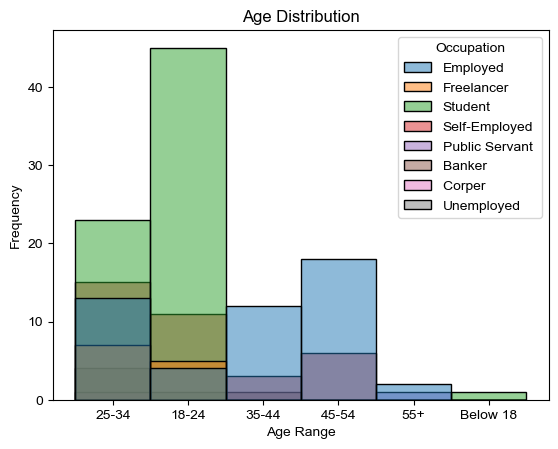

In [33]:
sns.histplot(x = 'Age', data=df, hue='Occupation')
plt.title('Age Distribution')
plt.style.use('seaborn-v0_8-darkgrid')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.show()

The age distribution of respondents shows a clear skew towards younger adults, with 66% of respondents falling within the 18-24 age range. The 25-34 age range is also well-represented, accounting for 63 respondents.

Our analysis reveals that the majority of our respondents are young adults, with a significant proportion falling within the 18-24 age range. This suggests that our service is particularly appealing to this demographic. To further capitalize on this trend, we recommend tailoring our marketing efforts to target young adults and exploring ways to enhance our service to meet the unique needs and preferences of this age group.

In [34]:
df['Gender'].value_counts()

Gender
Female               94
Male                 78
Prefer not to say     1
Name: count, dtype: int64

In [35]:
Gender = df['Gender'].value_counts()
gender = []
gender_val = []
gender = Gender.index.tolist()
gender_val = Gender.values.tolist()
print("gender:", gender)
print("gender_val:", gender_val)

gender: ['Female', 'Male', 'Prefer not to say']
gender_val: [94, 78, 1]


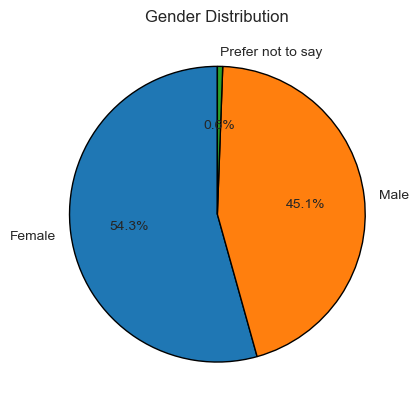

In [36]:
plt.pie(gender_val, labels=['Female', 'Male', 'Prefer not to say'],startangle=90,wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.style.use('seaborn-v0_8-darkgrid')
plt.show()

The gender distribution of respondents shows a slight skew towards females, who account for 54.3% of respondents, while males account for 45.1%.

Our analysis reveals that our service attracts a diverse range of respondents, with a slight majority identifying as female. This suggests that our service is appealing to a broad range of individuals, regardless of gender. To further enhance our service, we recommend ensuring that our marketing efforts and service offerings are inclusive and tailored to meet the needs of both male and female respondents.

In [37]:
df['Occupation'].value_counts()

Occupation
Student            69
Employed           49
Self-Employed      35
Freelancer         12
Unemployed          5
Public Servant      1
Banker              1
Corper              1
Name: count, dtype: int64

In [38]:
Occupation = df['Occupation'].value_counts()
Occupations = []
Occupation_Int = []
Occupations = Occupation.index.tolist()
Occupation_Int = Occupation.values.tolist()
print("Occupations:", Occupations)
print("Occupation_Int:", Occupation_Int)

Occupations: ['Student', 'Employed', 'Self-Employed', 'Freelancer', 'Unemployed', 'Public Servant ', 'Banker', 'Corper ']
Occupation_Int: [69, 49, 35, 12, 5, 1, 1, 1]


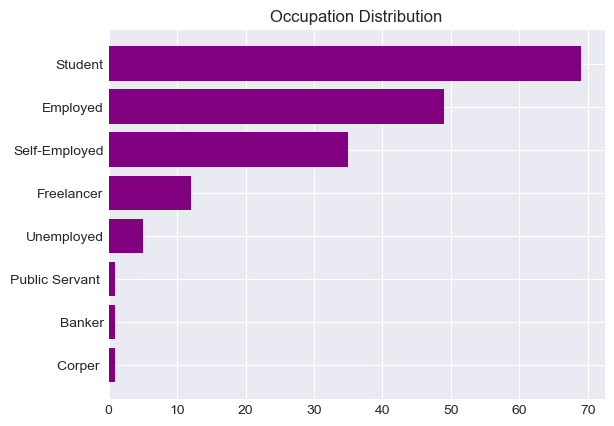

In [39]:
Occupations.reverse()
Occupation_Int.reverse()
plt.barh(Occupations, Occupation_Int,color='purple')
plt.title('Occupation Distribution')
plt.show()

The occupation distribution of respondents shows that students make up the largest proportion (43.4%), followed by employed individuals (30.8%), and self-employed individuals (22.0%).

Our analysis reveals that our service is particularly popular among students, who account for nearly half of our respondents. This suggests that our service is meeting the needs of individuals in educational pursuits. Additionally, our service also attracts a significant proportion of employed and self-employed individuals, indicating its relevance to a broader range of occupations. To further enhance our service, we recommend tailoring our offerings to meet the unique needs of students and working professionals.

In [40]:
df['Household Size'].value_counts()

Household Size
1 (Living Alone)    50
4 - 5               47
6+                  44
3 - 4               32
Name: count, dtype: int64

In [41]:
Household_Size = df['Household Size'].value_counts()
household_Size = []
Household_Size_Int = []
household_Size = Household_Size.index.tolist()
Household_Size_Int = Household_Size.values.tolist()
print("household_Size:", household_Size)
print("Household_Size_Int:", Household_Size_Int)

household_Size: ['1 (Living Alone)', '4 - 5', '6+', '3 - 4']
Household_Size_Int: [50, 47, 44, 32]


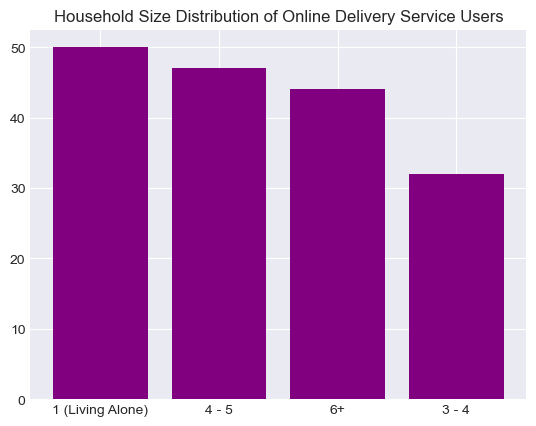

In [42]:
plt.bar(household_Size, Household_Size_Int, color='purple')
plt.title("Household Size Distribution of Online Delivery Service Users")
plt.show()

It appears that the majority of households using online delivery services have:

* 1 person (living alone): 50 households
* 6 or more people: 44 households

The remaining households have 3-4 people (32 households) and 4-5 people (47 households).

This suggests that TukShopp's online delivery services are popular among singles and large families.

In [43]:
df['Monthly Household Income'].value_counts()

Monthly Household Income
Less than N50,000      45
N50,000 - N100,000     42
N100,000 - N200,000    41
N300,000+              20
N200,000 - N300,000    20
Unknown                 5
Name: count, dtype: int64

In [44]:
Monthly_Household_Income = df['Monthly Household Income'].value_counts()
monthly_Household_Income = []
Monthly_Household_Income_Int = []
for income, count in Monthly_Household_Income.items():
    if income != "Unknown":
        monthly_Household_Income.append(income)
        Monthly_Household_Income_Int.append(count)
print("monthly_Household_Income:", monthly_Household_Income)
print("Monthly_Household_Income_Int:", Monthly_Household_Income_Int)

monthly_Household_Income: ['Less than N50,000', 'N50,000 - N100,000', 'N100,000 - N200,000', 'N300,000+', 'N200,000 - N300,000']
Monthly_Household_Income_Int: [45, 42, 41, 20, 20]


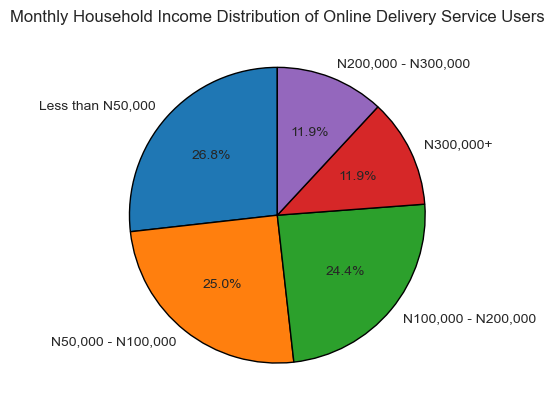

In [45]:
plt.pie(Monthly_Household_Income_Int, labels=['Less than N50,000', 'N50,000 - N100,000', 'N100,000 - N200,000', 'N300,000+', 'N200,000 - N300,000'], startangle=90, autopct="%1.1f%%",wedgeprops={'edgecolor':'black'})
plt.title('Monthly Household Income Distribution of Online Delivery Service Users')
plt.show()

The monthly household income distribution of respondents shows a relatively even spread across the lower to middle-income brackets, with the largest proportion (26.8%) earning less than N50,000.

Our analysis reveals that our service is primarily used by individuals from lower to middle-income households, with more than 60% of respondents earning less than N200,000 per month. This suggests that our service is accessible and relevant to a broad range of income groups. To further enhance our service, we recommend considering pricing strategies and offerings that cater to the needs of our lower to middle-income users.

In [46]:
df['Usage frequency of online delivery service'].value_counts()

Usage frequency of online delivery service
Rarely                  107
Weekly                   23
Monthly                  17
Daily                    11
Never                    11
Sometimes                 2
Yearly                    1
As they're available      1
Name: count, dtype: int64

In [47]:
Usage_frequency = df['Usage frequency of online delivery service'].value_counts()
usage_frequency = []
Usage_frequency_int = []
usage_frequency = Usage_frequency.index.tolist()
Usage_frequency_int = Usage_frequency.values.tolist()
print("usage_frequency:", usage_frequency)
print("Usage_frequency_int:", Usage_frequency_int)

usage_frequency: ['Rarely', 'Weekly', 'Monthly', 'Daily', 'Never', 'Sometimes', 'Yearly ', "As they're available"]
Usage_frequency_int: [107, 23, 17, 11, 11, 2, 1, 1]


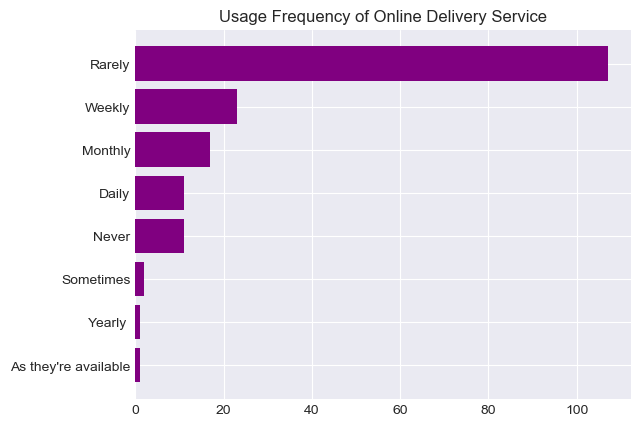

In [48]:
usage_frequency.reverse()
Usage_frequency_int.reverse()
plt.barh(usage_frequency, Usage_frequency_int, color='purple')
plt.title( "Usage Frequency of Online Delivery Service")
plt.show()

The usage frequency of online delivery services among respondents shows that the majority (66.5%) rarely use these services, while a smaller proportion use them weekly (14.3%), monthly (10.6%), or daily (6.9%).

Our analysis reveals that online delivery services are not yet a regular part of most respondents' lives, with over 66% reporting rare usage. However, a significant minority use these services weekly, monthly, or daily, indicating a growing trend towards online delivery adoption. To further capitalize on this trend, we recommend investing in marketing efforts to raise awareness and drive adoption among the majority who rarely use online delivery services.

In [49]:
order_counter = Counter()
freq_ordered_product = df['Products frequently ordered online']
for order in freq_ordered_product:
    order_counter.update(order.split(';'))
print(order_counter)

Counter({'Meals from Restaurants': 74, 'Electronics/Gadgets': 66, 'Groceries': 23, 'Beverages': 10, 'Pharmacetical Products': 10, 'Clothes': 7, 'Unknown': 5, 'I do not really order anything online': 2, 'Clothings': 1, 'Skincare products ': 1, 'Underwear ': 1, 'Clothes and other assesories ': 1, 'Textiles, jewelry ': 1, 'Cloths and shoes': 1, "It's Groceries I've been looking for o. I thought GoLemon would be here, but they're only in Lagos": 1, 'Clothes, shoes and accessories': 1, 'Accessories and clothing ': 1, 'Clothes,  shoes,  bags and accessories ': 1, 'Clothing materials': 1, 'Shoes and clothing ': 1, 'Hair': 1, 'Clothing/shoes ': 1, 'Shoes': 1, 'Clothes/shoes': 1, 'Shoe': 1, 'Cloths and sneakers ': 1, 'Clothes and shoes ': 1, 'Skincare ': 1, 'Accessories ': 1})


In [50]:
Freq_ordered_product = []
freq_ordered_product_int = []
for Order_Counter in order_counter.most_common(10):
    if Order_Counter[0] != 'Unknown':
        Freq_ordered_product.append(Order_Counter[0])
        freq_ordered_product_int.append(Order_Counter[1])
print("Freq_ordered_product:", Freq_ordered_product)
print("freq_ordered_product_int:", freq_ordered_product_int)

Freq_ordered_product: ['Meals from Restaurants', 'Electronics/Gadgets', 'Groceries', 'Beverages', 'Pharmacetical Products', 'Clothes', 'I do not really order anything online', 'Clothings', 'Skincare products ']
freq_ordered_product_int: [74, 66, 23, 10, 10, 7, 2, 1, 1]


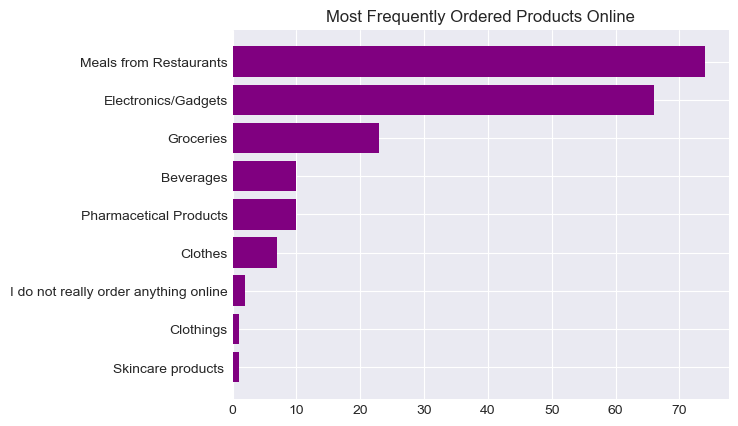

In [51]:
Freq_ordered_product.reverse()
freq_ordered_product_int.reverse()
plt.barh(Freq_ordered_product, freq_ordered_product_int, color='purple')
plt.title("Most Frequently Ordered Products Online")
plt.show()

The products frequently ordered online show a clear preference for 'Meals from Restaurants' (44.6%) and 'Electronics/Gadgets' (39.8%), followed by 'Groceries' (13.8%).

Our analysis reveals that online ordering habits in Nigeria are driven primarily by convenience and necessity, with meals from restaurants and electronics/gadgets being the most frequently ordered products. This suggests opportunities for businesses to tap into these markets and expand their online presence. Furthermore, the relatively low frequency of grocery ordering online presents an area for growth and development in the e-commerce sector.

In [52]:
pay_counter = Counter()
Payment_method = df['Payment method']
for pay in Payment_method:
    pay_counter.update(pay.split(';'))
print(pay_counter)

Counter({'Bank Transfer': 90, 'Cash on Delivery': 73, 'Debit/Credit Card': 36, 'Mobile Money': 15, 'Unknown': 2, 'Bags': 1, 'Cant say yet': 1, "Pay On Delivery. It's a win -win": 1})


In [53]:
payment_method = []
payment_method_int = []
for method in pay_counter.items():
    if method[0] != 'Unknown':
        payment_method.append(method[0])
        payment_method_int.append(method[1])
print("payment_method:", payment_method)
print("payment_method_int:", payment_method_int)

payment_method: ['Cash on Delivery', 'Bank Transfer', 'Debit/Credit Card', 'Mobile Money', 'Bags', 'Cant say yet', "Pay On Delivery. It's a win -win"]
payment_method_int: [73, 90, 36, 15, 1, 1, 1]


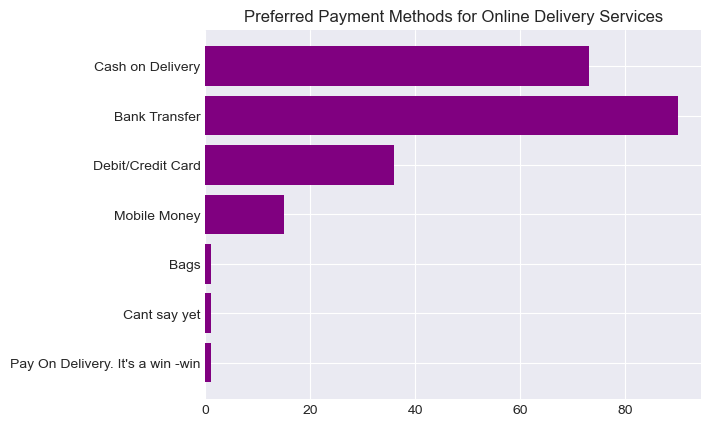

In [54]:
payment_method_int.reverse()
payment_method.reverse()
plt.barh(payment_method, payment_method_int, color='purple')
plt.title("Preferred Payment Methods for Online Delivery Services")
plt.show()

The payment method preferences show a clear lead for Bank Transfer (45.5%) and Cash on Delivery (36.9%), followed by Debit/Credit Card (18.2%).

Our analysis reveals that online payment preferences in Nigeria are skewed towards traditional methods, with bank transfers and cash on delivery being the most popular options. This suggests a need for businesses to accommodate these preferences and provide secure, convenient payment options to drive online transactions. Additionally, the relatively low adoption of mobile money and debit/credit cards presents an opportunity for growth and development in the digital payments sector.

In [55]:
df['Amount spent online'].value_counts()

Amount spent online
N5,000 - N10,000     67
Less than N5,000     45
N10,000 - N50,000    40
N50,000+             16
Unknown               5
Name: count, dtype: int64

In [56]:
Amount_spent = df['Amount spent online'].value_counts()
amount_spent = []
amount_spent_int = []
Amount_spent = Amount_spent[Amount_spent.index != "Unknown"]
amount_spent = Amount_spent.index.tolist()
amount_spent_int = Amount_spent.values.tolist()
print("amount_spent:", amount_spent)
print("amount_spent_int:", amount_spent_int)

amount_spent: ['N5,000 - N10,000', 'Less than N5,000', 'N10,000 - N50,000', 'N50,000+']
amount_spent_int: [67, 45, 40, 16]


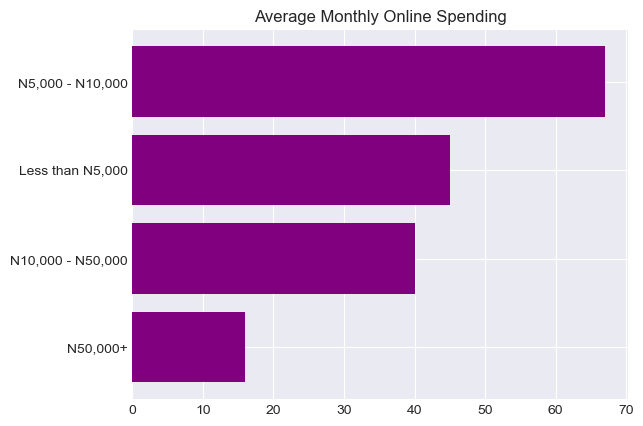

In [57]:
amount_spent.reverse()
amount_spent_int.reverse()
plt.barh(amount_spent, amount_spent_int, color='purple')
plt.title("Average Monthly Online Spending")
plt.show()

The amount spent online shows a clear concentration in the lower to middle brackets, with 67 respondents spending between N5,000 to N10,000 and 45 respondents spending less than N5,000.

Our analysis reveals that online spending habits in Jos, Plateau State are characterized by relatively low transaction values, with most respondents spending less than N10,000 per transaction. This suggests opportunities for businesses to offer affordable products and services that cater to the budget-conscious online shopper. Additionally, the relatively small proportion of high-value transactions (N50,000+) presents a niche market for luxury goods and services.

In [58]:
Method_counter = Counter()
Method_of_order = df['Method of placing order']
for order_method in Method_of_order:
    Method_counter.update(order_method.split(';'))
print(Method_counter)

Counter({'WhatsApp/Instagram': 80, 'Mobile App': 66, 'Phone Call': 53, 'Website': 45, 'Unknown': 2, 'None': 2, 'Mobile App or WhatsApp or Phone Call works fine for me': 1, 'Store': 1})


In [59]:
method = []
method_counts = []
for METHOD in Method_counter.items():
    if METHOD[0] != "Unknown":
        method.append(METHOD[0])
        method_counts.append(METHOD[1])
print("method:", method)
print("method_counts:", method_counts)

method: ['Mobile App', 'WhatsApp/Instagram', 'Website', 'Phone Call', 'Mobile App or WhatsApp or Phone Call works fine for me', 'Store', 'None']
method_counts: [66, 80, 45, 53, 1, 1, 2]


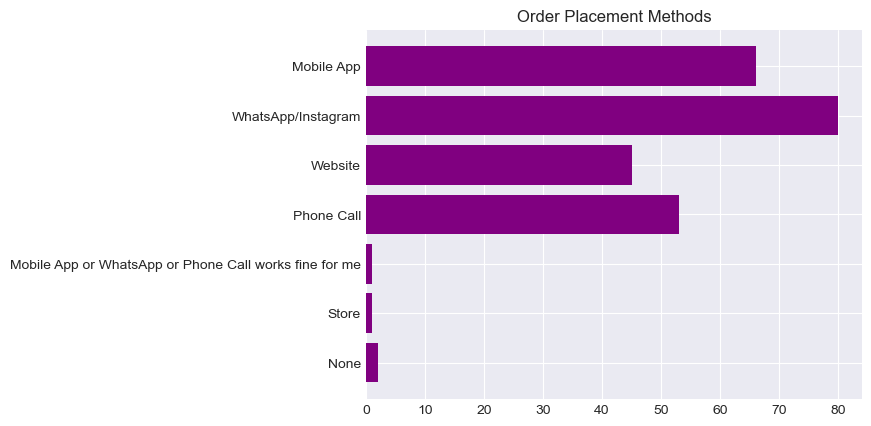

In [60]:
method.reverse()
method_counts.reverse()
plt.barh(method, method_counts, color='purple')
plt.title("Order Placement Methods")
plt.show()

The method of placing orders shows a preference for social media and messaging platforms, with 80 respondents using WhatsApp/Instagram, followed by mobile apps (66) and phone calls (53).

Our analysis reveals that online shoppers in Jos, Plateau State prefer convenient and familiar channels for placing orders, with WhatsApp/Instagram emerging as the most popular method. This highlights the importance of having a strong social media presence and leveraging messaging platforms to facilitate transactions. Businesses can capitalize on this trend by integrating ordering capabilities into their social media and messaging channels.

In [61]:
Time_counter = Counter()
Time_of_order = df['Time of placing order']
for order_time in Time_of_order:
    Time_counter.update(order_time.split(';'))
print(Time_counter)

Counter({'Afternoon': 84, 'Morning': 65, 'Evening': 57, 'Late Night': 19})


In [62]:
Time = []
time_counter = []
for time in Time_counter.items():
    Time.append(time[0])
    time_counter.append(time[1])
print("Time:", Time)
print("time_counter:", time_counter)

Time: ['Morning', 'Afternoon', 'Evening', 'Late Night']
time_counter: [65, 84, 57, 19]


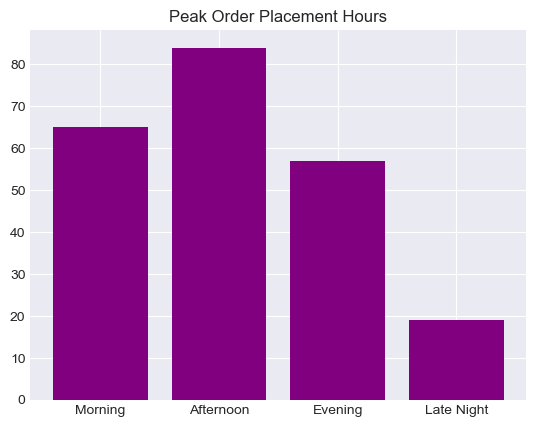

In [63]:
plt.bar(Time, time_counter, color="purple")
plt.title("Peak Order Placement Hours")
plt.show()

The time of placing orders shows a relatively even distribution across daytime hours, with afternoons being the most popular time (44.7%), followed by mornings (34.7%) and evenings (30.5%).

Our analysis reveals that online shoppers in Jos, Plateau State tend to place orders during daytime hours, with afternoons being the peak period. This suggests that businesses should prioritize ensuring a seamless and efficient online shopping experience during these hours. Additionally, businesses may consider offering targeted promotions or discounts during off-peak hours to drive sales and increase customer engagement.

In [64]:
reason_counter = Counter()
delivery_service_reason = df['Reason for using online delivery service']
for service_reason in delivery_service_reason:
    reason_counter.update(service_reason.split(';'))
print(reason_counter)

Counter({'Convenience': 120, 'Time-saving': 69, 'Avoiding crowded places': 45, 'Limited mobility/transportation': 37, 'Preference for online shopping': 14})


In [65]:
reason = []
reason_counts = []
for REASON in reason_counter.items():
    reason.append(REASON[0])
    reason_counts.append(REASON[1])
print("reason:", reason)
print("reason_counts:", reason_counts)

reason: ['Convenience', 'Time-saving', 'Avoiding crowded places', 'Limited mobility/transportation', 'Preference for online shopping']
reason_counts: [120, 69, 45, 37, 14]


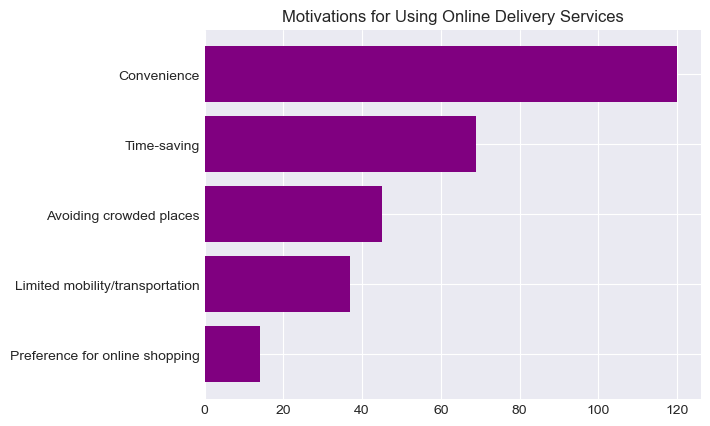

In [66]:
reason.reverse()
reason_counts.reverse()
plt.barh(reason, reason_counts, color='purple')
plt.title("Motivations for Using Online Delivery Services")
plt.show()

The reasons for using online delivery services show a clear emphasis on convenience, with 120 respondents citing this as a primary reason, followed by time-saving (69) and avoiding crowded places (45).

Our analysis reveals that convenience is the primary driver for using online delivery services in Jos, Plateau State with respondents valuing the time-saving and hassle-free experience it provides. This highlights the importance of businesses prioritizing user-friendly interfaces, efficient logistics, and reliable delivery options to meet the evolving needs of online shoppers.

In [67]:
df['Importance of delivery time'].value_counts()

Importance of delivery time
Very Important    129
Important          31
Neutral            13
Name: count, dtype: int64

In [68]:
Importance_of_delivery_time = df['Importance of delivery time'].value_counts()
Importances = []
delivery_time = []
Importance = Importance_of_delivery_time.index.tolist()
delivery_time = Importance_of_delivery_time.values.tolist()
print("Importance:", Importance)
print("delivery_time:", delivery_time)

Importance: ['Very Important', 'Important', 'Neutral']
delivery_time: [129, 31, 13]


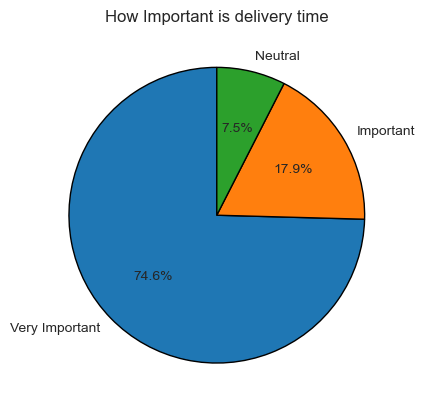

In [69]:
plt.pie(delivery_time, labels=['Very Important', 'Important', 'Neutral'], startangle=90, autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title("How Important is delivery time")
plt.show()

The importance of delivery time shows a clear emphasis on speed, with 129 respondents rating it as "Very Important" (74.6%), followed by 31 respondents rating it as "Important" (17.9%).

Our analysis reveals that delivery time is a critical factor for online shoppers in Jos, Plateau State with an overwhelming majority considering it very important. This highlights the need for businesses to prioritize fast and reliable delivery options to meet customer expectations and drive satisfaction.

In [70]:
Priority_counter = Counter()
delivery_Priority = df['Priority in choosing delivery service']
for Priority in delivery_Priority:
    Priority_counter.update(Priority.split(';'))
print(Priority_counter)

Counter({'Quality of Products': 107, 'Speed of Delivery': 101, 'Cost of Delivery': 88, 'Customer Service': 76, 'Ease of Ordering': 63, 'Range of Products': 33, 'Unknown': 1})


In [71]:
Priority = []
Priority_count = []
for COUNT in Priority_counter.items():
    if COUNT[0] != "Unknown":
        Priority.append(COUNT[0])
        Priority_count.append(COUNT[1])
print("Priority:",Priority)
print("Priority_count:",Priority_count)

Priority: ['Cost of Delivery', 'Quality of Products', 'Speed of Delivery', 'Ease of Ordering', 'Customer Service', 'Range of Products']
Priority_count: [88, 107, 101, 63, 76, 33]


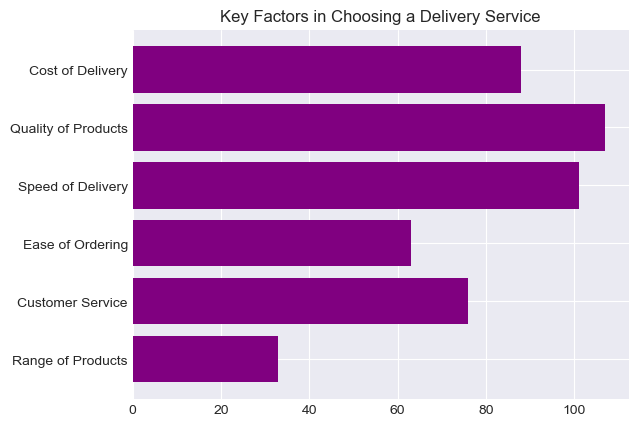

In [72]:
Priority.reverse()
Priority_count.reverse()
plt.barh(Priority, Priority_count, color='purple')
plt.title("Key Factors in Choosing a Delivery Service")
plt.show()

The priorities in choosing a delivery service show a close competition between quality of products, speed of delivery, and cost of delivery, with 107, 101, and 88 respondents prioritizing these factors, respectively.

Our analysis reveals that online shoppers in Jos, Plateau State prioritize a combination of factors when choosing a delivery service, with quality of products, speed of delivery, and cost of delivery emerging as the top three considerations. Businesses can differentiate themselves by focusing on these key areas and ensuring that their delivery services meet the evolving expectations of online shoppers.

In [73]:
feature_counter = Counter()
important_app_feature = df['Most important feature on delivery app']
for features in important_app_feature:
    feature_counter.update(features.split(';'))
print(feature_counter)

Counter({'Real-time Order Tracking': 92, 'User-friendly Interface': 73, 'Discounts and Promotions': 53, 'Multiple Payment Options': 46, 'Customer Reviews and Ratings': 37, 'Safety of the food': 1})


In [74]:
feature = []
feature_count = []
for Feat in feature_counter.items():
    feature.append(Feat[0])
    feature_count.append(Feat[1])
print("feature:",feature)
print("feature_count:",feature_count)

feature: ['Real-time Order Tracking', 'Multiple Payment Options', 'User-friendly Interface', 'Discounts and Promotions', 'Customer Reviews and Ratings', 'Safety of the food']
feature_count: [92, 46, 73, 53, 37, 1]


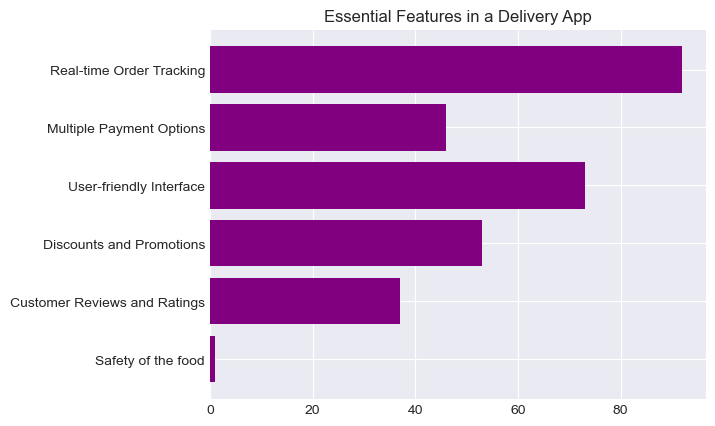

In [75]:
feature.reverse()
feature_count.reverse()
plt.barh(feature, feature_count, color='purple')
plt.title("Essential Features in a Delivery App")
plt.show()

The most important feature on a delivery app shows a clear emphasis on transparency and control, with 92 respondents prioritizing real-time order tracking.

Our analysis reveals that real-time order tracking is the most valued feature among online shoppers in Nigeria, highlighting the importance of transparency and control in the delivery process. Businesses can enhance customer satisfaction by integrating robust tracking capabilities into their delivery apps, providing users with timely updates and peace of mind. 

In [76]:
df['Satisfaction on Jos delivery services'].value_counts()

Satisfaction on Jos delivery services
Neutral              94
Satisfied            39
Very Satisfied       19
Dissatisfied         16
Very Dissatisfied     5
Name: count, dtype: int64

In [77]:
delivery_services_satisfaction = df['Satisfaction on Jos delivery services'].value_counts()
delivery_services_satisfaction_str = []
delivery_services_satisfaction_int = []
delivery_services_satisfaction_str = delivery_services_satisfaction.index.tolist()
delivery_services_satisfaction_int = delivery_services_satisfaction.values.tolist()
print("delivery_services_satisfaction_str:",delivery_services_satisfaction_str)
print("delivery_services_satisfaction_int:",delivery_services_satisfaction_int)

delivery_services_satisfaction_str: ['Neutral', 'Satisfied', 'Very Satisfied', 'Dissatisfied', 'Very Dissatisfied']
delivery_services_satisfaction_int: [94, 39, 19, 16, 5]


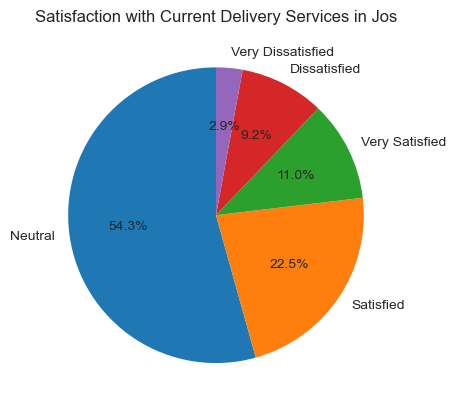

In [78]:
plt.pie(delivery_services_satisfaction_int, labels=['Neutral', 'Satisfied', 'Very Satisfied', 'Dissatisfied', 'Very Dissatisfied'], startangle=90,autopct='%1.1f%%')
plt.title("Satisfaction with Current Delivery Services in Jos")
plt.show()

The satisfaction level with Jos delivery services shows a mixed response, with the majority (54.3%) of respondents reporting a neutral experience.

Our analysis reveals that Jos delivery services receive a lukewarm response from customers, with many expressing neutral sentiments. While some customers are satisfied or very satisfied, a significant proportion are dissatisfied or very dissatisfied. To improve customer satisfaction, delivery services in Jos should focus on enhancing reliability, communication, and overall quality of service.

In [79]:
Challenges_counter = Counter()
Challenges_using_online_delivery = df['Challenges using online delivery service']
for Challenges in Challenges_using_online_delivery:
    Challenges_counter.update(Challenges.split(';'))
print(Challenges_counter)

Counter({'Delayed Deliveries': 96, 'Inconsistent Service': 63, 'High Delivery Costs': 49, 'Poor Product Quality': 39, 'Difficulty in Ordering': 30, 'Limited Product Availability': 29, 'Payment Issues': 14, 'I never had a challenge with the delivery services in jos': 3, 'Unknown': 3, 'Havent use any yet': 1, 'Unavailability': 1, 'Poor delivery service': 1, 'Some items on the menu are not available ': 1})


In [80]:
Challenges = []
Challenges_count = []
for Challenge in Challenges_counter.items():
    if Challenge[0] != "Unknown":
        Challenges.append(Challenge[0])
        Challenges_count.append(Challenge[1])
print("Challenges:",Challenges)
print("Challenges_count:",Challenges_count)

Challenges: ['Delayed Deliveries', 'Poor Product Quality', 'High Delivery Costs', 'Inconsistent Service', 'Limited Product Availability', 'Difficulty in Ordering', 'I never had a challenge with the delivery services in jos', 'Payment Issues', 'Havent use any yet', 'Unavailability', 'Poor delivery service', 'Some items on the menu are not available ']
Challenges_count: [96, 39, 49, 63, 29, 30, 3, 14, 1, 1, 1, 1]


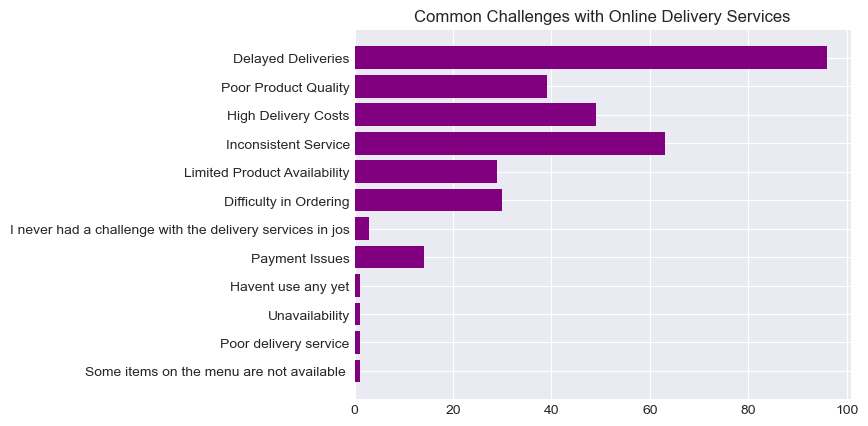

In [81]:
Challenges.reverse()
Challenges_count.reverse()
plt.barh(Challenges,Challenges_count,color='purple')    
plt.title("Common Challenges with Online Delivery Services")
plt.show()

The challenges faced when using online delivery services in Jos show that delayed deliveries (55.2%) and inconsistent service (36.4%) are the most significant pain points.

Our analysis reveals that online delivery services in Jos face significant challenges, primarily related to delayed deliveries and inconsistent service. To improve customer satisfaction, delivery services should focus on enhancing their logistics and operational efficiency, providing real-time updates, and ensuring a reliable and consistent experience. 

In [82]:
df['How certain will you use comprehensive delivery service'].value_counts()

How certain will you use comprehensive delivery service
Likely           78
Very Likely      53
Neutral          35
Unlikely          6
Very Unlikely     1
Name: count, dtype: int64

In [83]:
certaintity = df['How certain will you use comprehensive delivery service'].value_counts()
certain = []
certain_count = []
certain = certaintity.index.tolist()
certain_count = certaintity.values.tolist()
print("certain:",certain)
print("certain_count:",certain_count)

certain: ['Likely', 'Very Likely', 'Neutral', 'Unlikely', 'Very Unlikely']
certain_count: [78, 53, 35, 6, 1]


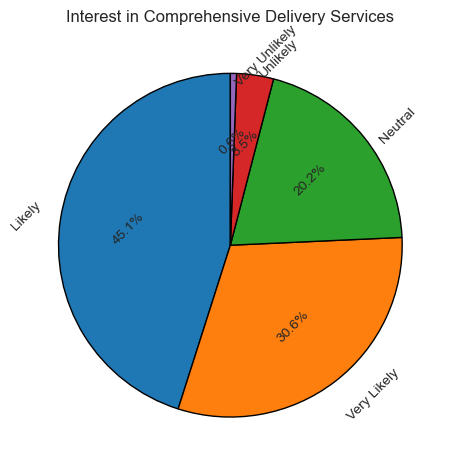

In [84]:
plt.pie(certain_count, labels=['Likely', 'Very Likely', 'Neutral', 'Unlikely', 'Very Unlikely'],startangle=90,wedgeprops={'edgecolor':'black'},textprops={'rotation': 45},autopct='%1.1f%%')
plt.title("Interest in Comprehensive Delivery Services")
plt.tight_layout()
plt.show()

The willingness to use a comprehensive delivery service shows a positive trend, with 131 respondents (75% combined) indicating they are likely or very likely to use such a service.

Our analysis reveals a strong appetite for comprehensive delivery services, with the majority of respondents expressing a willingness to use such services. This presents a significant opportunity for businesses to develop and market comprehensive delivery solutions that meet the evolving needs of online shoppers.

In [85]:
df['Budget for delivery service'].value_counts()

Budget for delivery service
N500 - N1000                102
N1000 - N5000                43
Less than N500               19
Monthly Household Income      6
More than N5000               2
Unknown                       1
Name: count, dtype: int64

In [86]:
Budget = df['Budget for delivery service'].value_counts()
budget = []
budget_count = []
Budget = Budget[Budget.index != "Unknown"]
budget = Budget.index.tolist()
budget_count = Budget.values.tolist()
print("budget:",budget)
print("budget_count:",budget_count)

budget: ['N500 - N1000', 'N1000 - N5000', 'Less than N500', 'Monthly Household Income', 'More than N5000']
budget_count: [102, 43, 19, 6, 2]


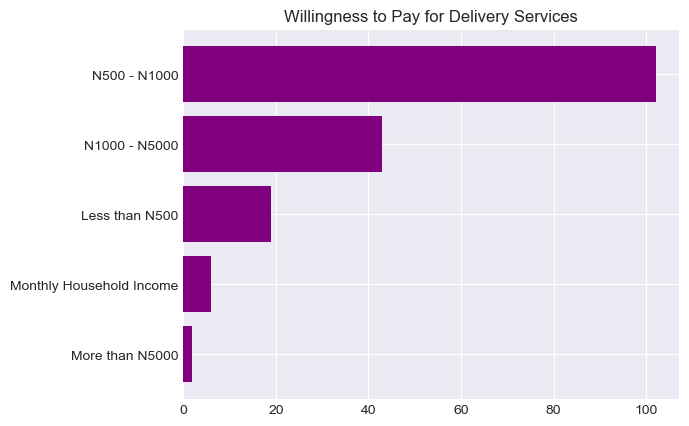

In [87]:
budget_count.reverse()
budget.reverse()
plt.barh(budget,budget_count,color='purple')
plt.title( "Willingness to Pay for Delivery Services")
plt.show()

Willingness to Pay for Delivery Services

- 50.5%: N500 - N1000 (102 respondents)
- 21.5%: N1000 - N5000 (43 respondents)
- 9.5%: Less than N500 (19 respondents)
- 3%: Monthly Household Income (6 respondents)
- 1%: More than N5000 (2 respondents)
- 0.5%: Unknown (1 respondent)

This data suggests that most respondents (50.5%) are willing to pay between N500 to N1000 for delivery services.

In [88]:
df['Prefer subscrption based delivery service?'].value_counts()

Prefer subscrption based delivery service?
Maybe    72
Yes      62
No       39
Name: count, dtype: int64

In [89]:
subscrption = df['Prefer subscrption based delivery service?'].value_counts()
Subscrption = []
subscrption_count = []
Subscrption = subscrption.index.tolist()
subscrption_count = subscrption.values.tolist()
print("Subscrption:",Subscrption)
print("subscrption_count:",subscrption_count)

Subscrption: ['Maybe', 'Yes', 'No']
subscrption_count: [72, 62, 39]


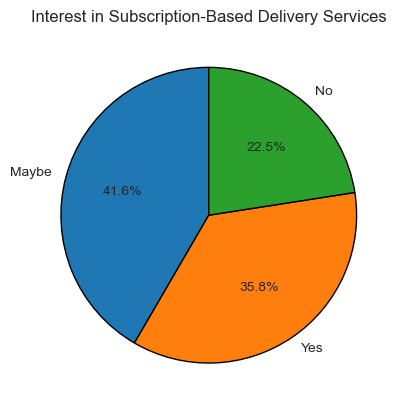

In [90]:
plt.pie(subscrption_count,labels=['Maybe', 'Yes', 'No'],autopct='%1.1f%%',startangle=90,wedgeprops={'edgecolor':'black'})
plt.title( "Interest in Subscription-Based Delivery Services")
plt.show()

Respondents are almost evenly split on their preference for subscription-based delivery services, with 62 (35.8%) saying YES, 39 (22.5%) saying NO, and 72 (41%) being undecided.

Our analysis reveals a mixed response to subscription-based delivery services, with a significant proportion of respondents being undecided. This suggests that businesses should carefully consider their target market and pricing strategy before introducing subscription-based models.

In [91]:
make_Choice_counter = Counter()
How_to_make_Choice_on_deliv_serv = df['How to make Choice on delivery service to use']
for Choice in How_to_make_Choice_on_deliv_serv:
    make_Choice_counter.update(Choice.split(';'))
print(make_Choice_counter)

Counter({'Recommendations from Friends/Family': 110, 'Previous Experience': 57, 'Online Reviews': 50, 'Price Comparison': 44, 'Advertisements': 34, 'Personal choice': 1, 'I no dey order things online': 1})


In [92]:
How_to_make_Choice_on_deliv_serv_int = []
How_to_make_Choice_on_deliv_serv_str = []
for choicee, count in make_Choice_counter.items():
    How_to_make_Choice_on_deliv_serv_str.append(choicee)
    How_to_make_Choice_on_deliv_serv_int.append(count)
print(How_to_make_Choice_on_deliv_serv_int)
print(How_to_make_Choice_on_deliv_serv_str)

[110, 50, 57, 34, 44, 1, 1]
['Recommendations from Friends/Family', 'Online Reviews', 'Previous Experience', 'Advertisements', 'Price Comparison', 'Personal choice', 'I no dey order things online']


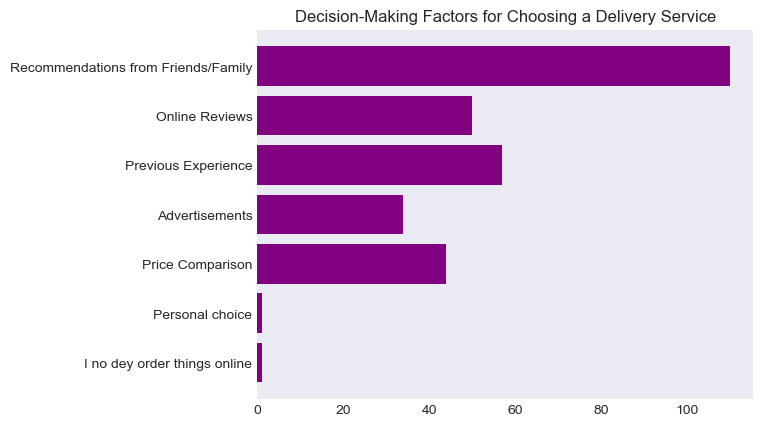

In [93]:
How_to_make_Choice_on_deliv_serv_int.reverse()
How_to_make_Choice_on_deliv_serv_str.reverse()
plt.barh(How_to_make_Choice_on_deliv_serv_str, How_to_make_Choice_on_deliv_serv_int,color='purple')
plt.title("Decision-Making Factors for Choosing a Delivery Service")
plt.grid()
plt.show()

The decision-making process for choosing a delivery service is largely influenced by personal recommendations and past experiences, with 110 respondents relying on recommendations from friends and family, and 57 considering their previous experiences.

Our analysis reveals that word-of-mouth recommendations and personal experiences play a significant role in shaping customer decisions when selecting a delivery service. Businesses should prioritize building strong relationships with customers and encouraging positive reviews to drive loyalty and attract new customers.

In [94]:
df['Prefer ordering from popular eateries?'].value_counts()

Prefer ordering from popular eateries?
Well-known Restaurants    86
No Preference             64
Local Eateries            23
Name: count, dtype: int64

In [95]:
Prefer_ordering_from_popular_eateries = df['Prefer ordering from popular eateries?'].value_counts()
Prefer_ordering_from_popular_eateries_strings = []
Prefer_ordering_from_popular_eateries_integers = []
Prefer_ordering_from_popular_eateries_strings = Prefer_ordering_from_popular_eateries.index.tolist()
Prefer_ordering_from_popular_eateries_integers = Prefer_ordering_from_popular_eateries.values.tolist()
print("Prefer_ordering_from_popular_eateries_strings:", Prefer_ordering_from_popular_eateries_strings)
print("Prefer_ordering_from_popular_eateries_integers:", Prefer_ordering_from_popular_eateries_integers)

Prefer_ordering_from_popular_eateries_strings: ['Well-known Restaurants', 'No Preference', 'Local Eateries']
Prefer_ordering_from_popular_eateries_integers: [86, 64, 23]


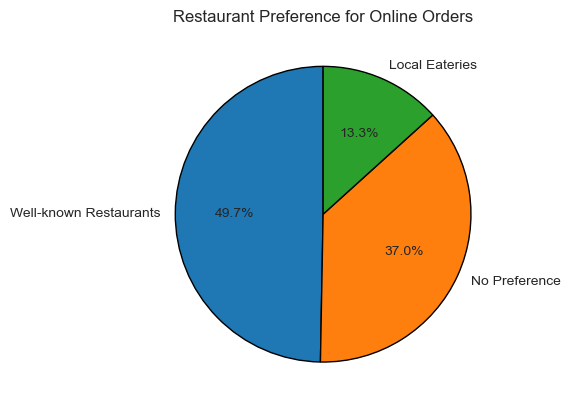

In [96]:
plt.pie(Prefer_ordering_from_popular_eateries_integers, labels=['Well-known Restaurants', 'No Preference', 'Local Eateries'],startangle=90, autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title("Restaurant Preference for Online Orders")
plt.show()

Respondents show a strong preference for ordering from well-known restaurant chains (49.7%), followed by those with no preference (37%), and a smaller proportion preferring local eateries (13.3%).

Our analysis reveals that brand recognition and familiarity drive customer preferences when ordering food online, with well-known restaurant chains being the most popular choice. However, a significant proportion of respondents remain open to options, highlighting opportunities for local eateries to gain traction through effective marketing and quality service.

In [97]:
df['Suggest Improvement'].value_counts()

Suggest Improvement
Unknown                                                                                                                                    73
Delivery on time                                                                                                                           28
Cleanliness of the delivery person                                                                                                          2
Delivery on time & product quality                                                                                                          2
Consistent delivery of service                                                                                                              1
                                                                                                                                           ..
Availability                                                                                                                    

In [98]:
Suggest_Improvement = df['Suggest Improvement'].value_counts()
Suggest_Improvement_strings = []
Suggest_Improvement_integers = []
Suggest_Improvement_strings = Suggest_Improvement.index.tolist()
Suggest_Improvement_integers = Suggest_Improvement.values.tolist()
print("Suggest_Improvement_strings:", Suggest_Improvement_strings)
print("Suggest_Improvement_integers:", Suggest_Improvement_integers)

Suggest_Improvement_strings: ['Unknown', 'Delivery on time', 'Cleanliness of the delivery person ', 'Delivery on time & product quality', 'Consistent delivery of service', 'Quality products,  timely delivery and moderate prices ', 'Quality of service and products ', 'Just be sincere', 'Quality of products', 'Insurance', 'Consistency and well-mannered customer service providers ', 'Quality of the product, customer service, ', 'Delivery cost should be reduce', 'Accuracy ', 'When ordering food or beverage, the safety of such items should be considered to avoid delivering smeared items ', 'Less charges ', 'There consistency and availability to accepting request ', 'Quality ', 'Special delicacies from all parts of Nigeria especially south south', 'Refer', 'Costumer care', 'On time management and ease of ordering ', 'Nothing really just keep doing what you doing ', 'Quick response ', 'Consistent ', 'Ease, speed and affordable price rate', 'Try to give customers what they ordered ', 'Cost', '

In [99]:
top_7_suggestions = Suggest_Improvement.nlargest(7)
top_7_suggestions = top_7_suggestions[top_7_suggestions.index != 'Unknown']
Suggest_Improvement_strings = top_7_suggestions.index.tolist()
Suggest_Improvement_integers = top_7_suggestions.values.tolist()
print("Suggest_Improvement_strings:", Suggest_Improvement_strings)
print("Suggest_Improvement_integers:", Suggest_Improvement_integers)

Suggest_Improvement_strings: ['Delivery on time', 'Cleanliness of the delivery person ', 'Delivery on time & product quality', 'Consistent delivery of service', 'Quality products,  timely delivery and moderate prices ', 'Quality of service and products ']
Suggest_Improvement_integers: [28, 2, 2, 1, 1, 1]


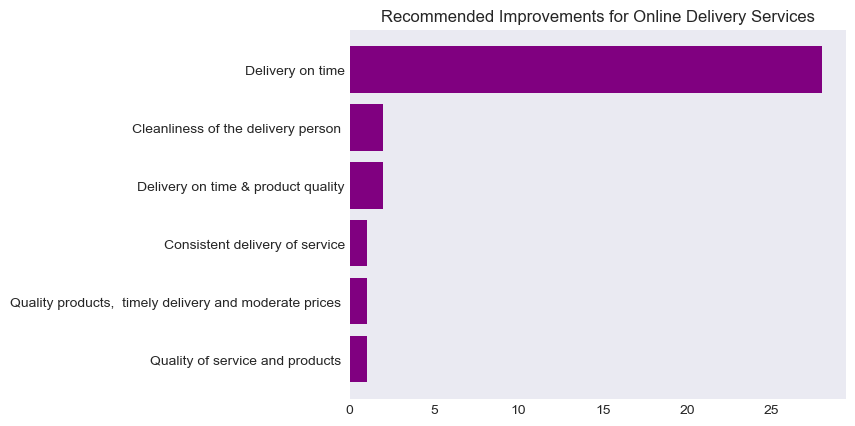

In [100]:
Suggest_Improvement_integers.reverse()
Suggest_Improvement_strings.reverse()
plt.barh(Suggest_Improvement_strings,Suggest_Improvement_integers,color='purple')
plt.title("Recommended Improvements for Online Delivery Services")
plt.grid()
plt.show()

Top Suggested Improvements for Online Delivery Services in Jos

1. Delivery on Time: Ensure timely delivery of orders.
2. Cleanliness of Delivery Person: Maintain high standards of hygiene for delivery personnel.
3. Delivery on Time & Product Quality: Focus on delivering high-quality products on time.
4. Consistent Delivery of Service: Provide consistent and reliable delivery services.
5. Quality Products, Timely Delivery, and Moderate Prices: Offer quality products, deliver on time, and maintain affordable prices.
6. Quality of Service and Products: Prioritize exceptional service and product quality.

Other Improvements
1. Accuracy and reliability
2. Ease of ordering and navigation
3. Safety and hygiene of delivered items
4. Insurance and security
5. More delivery options and services
6. Virtual tracking and updates
7. Trustworthiness and transparency
8. Specialized services, such as delivering local delicacies

Our analysis reveals that customers in Jos prioritize timely delivery, quality products and services, consistency, and excellent customer service when it comes to online delivery services. To improve customer satisfaction, businesses should focus on enhancing these key areas while also considering affordability, accuracy, and safety.

In [101]:
df['Suggest features/services for Tukshopp'].unique()

array(['None for now', 'Different options to select from ',
       'Electronics ', 'Unknown', 'Errand service', 'Good packaging',
       'To show previews of items to be delivered ', 'Good services',
       'Never heard of tukshopp, untill I do and use ur product then will be able to say',
       'Accessories ', 'Excellent services', 'Gadgets devices delivery ',
       'Speedy delivery ', 'Canâ€™t think of any',
       'Accurate rendering of service e', 'No ', 'I donâ€™t think ',
       "Always Keep to time then you'll be the best ðŸ™\x8f",
       'Company Merch for consistent, loyal customers. Loyalty cards',
       'Feature that could allow feedbacks from customers and also other range of products like clothes and shoes',
       'Rating deliveries ', 'Free delivery for a start ',
       'Better customer care', 'The best they can ', 'Adequate service',
       'All the African Soup types ', 'Delivery rating',
       'great improvement ', 'Just be different and do your best. ',
       '

In [102]:
df['Suggest features/services for Tukshopp'] = df['Suggest features/services for Tukshopp'].replace(['None for now','No ','Not sure','I donâ€™t think '], 'No idea')
df['Suggest features/services for Tukshopp'] = df['Suggest features/services for Tukshopp'].replace(['Sell quality products ','Good quality '], 'No idea')
df['Suggest features/services for Tukshopp'] = df['Suggest features/services for Tukshopp'].replace(['Accurate rendering of service e','The best they can ',
                                                                                                     'Good services','Better customer care','Excellent services',
                                                                                                    'Errand service','great improvement ','Adequate service'], 'Great Customer Service')
df['Suggest features/services for Tukshopp'] = df['Suggest features/services for Tukshopp'].replace("Always Keep to time then you'll be the best ðŸ™\x8f",'Always Keep up to time')
Tukshopp_Suggested_features = df['Suggest features/services for Tukshopp'].value_counts()

In [103]:
Tukshopp_7_Suggested_features = Tukshopp_Suggested_features.nlargest(7)
Tukshopp_7_Suggested_features = Tukshopp_7_Suggested_features[Tukshopp_7_Suggested_features.index != 'Unknown']
Suggested_features_strings = Tukshopp_7_Suggested_features.index.tolist()
Suggested_features_integers = Tukshopp_7_Suggested_features.values.tolist()
print("Suggested_features_strings:", Suggested_features_strings)
print("Suggested_features_integers:", Suggested_features_integers)

Suggested_features_strings: ['No idea', 'Great Customer Service', 'Accessories ', 'Always Keep up to time', 'Just be different and do your best. ', 'Delivery rating']
Suggested_features_integers: [56, 8, 2, 1, 1, 1]


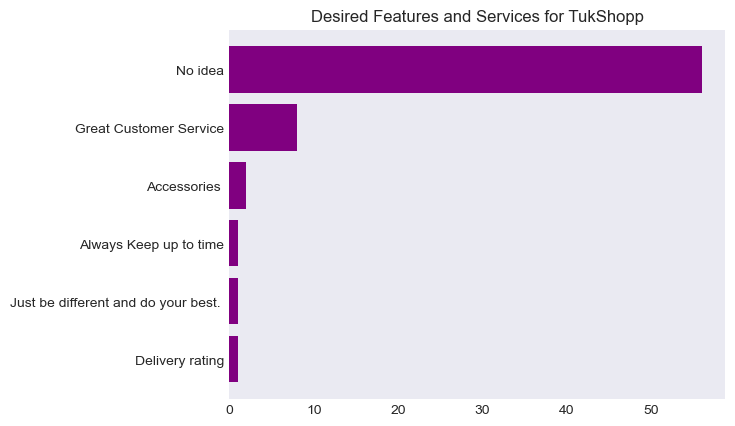

In [104]:
Suggested_features_integers.reverse()
Suggested_features_strings.reverse()
plt.barh(Suggested_features_strings,Suggested_features_integers, color='purple')
plt.title("Desired Features and Services for TukShopp")
plt.grid()
plt.show()

Here are some feature and service suggestions for Tukshopp:

Customer Experience
1. Great Customer Service: Ensure responsive and helpful support.
2. Feedback Mechanism: Allow customers to provide feedback and ratings.
3. Loyalty Program: Implement loyalty cards or rewards for consistent customers.

Product Offerings
1. African Soup Options: Offer a variety of African soup types.
2. Clothing and Shoes: Expand product range to include clothes and shoes.
3. Gadgets and Electronics: Include delivery of gadgets and electronics.
4. Accessories: Provide various accessory options.

Delivery and Logistics
1. Speedy Delivery: Prioritize fast and efficient delivery.
2. Free Delivery: Consider offering free delivery, especially for first-time customers.
3. Delivery Ratings: Allow customers to rate their delivery experience.
4. Good Packaging: Ensure secure and attractive packaging.

User Interface
1. Product Previews: Display item previews before delivery.
2. Different Options: Provide various options for customers to select from.

Pricing
1. Affordability: Maintain competitive and affordable prices.

Miscellaneous
1. Company Merch: Offer branded merchandise for loyal customers.
2. Rating System: Develop a rating system for deliveries and products.


Based on the analysis of customer satisfaction, challenges, preferences, and suggested improvements for online delivery services in Jos, here's an overall recommendation and conclusion:

## Overall Recommendation
To improve customer satisfaction and loyalty, online delivery services in Jos should focus on:

1. Timely and reliable delivery: Prioritize fast and efficient delivery to meet customer expectations.
2. Quality products and services: Ensure high-quality products and excellent customer service to build trust and loyalty.
3. Affordability and competitive pricing: Maintain competitive prices and consider offering promotions or discounts to attract and retain customers.
4. Effective communication and feedback mechanisms: Establish open communication channels and feedback systems to address customer concerns and improve services.
5. Expansion of product offerings: Consider adding new product categories, such as African soup options, clothing, shoes, gadgets, and electronics, to cater to diverse customer needs.

## Conclusion
The analysis highlights the importance of timely delivery, quality products, affordability, effective communication, and expanded product offerings in enhancing customer satisfaction and loyalty for online delivery services in Jos. By addressing these key areas, businesses can improve their services, attract and retain customers, and establish a strong market presence in the competitive online delivery market in Jos.

In [105]:
df.to_csv(r'C:\Users\Reuben Yohanna Vandi\Documents\PORTFOLIO\TukShopp Market Research by Reuben Yohanna Vandi\ dataset.csv', index=False)